In [2]:
import sqlite3 as db
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

connect & load dataset

In [3]:
conn = db.connect('E:\olist.db')
cur = conn.cursor()

In [5]:
table = cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")
table.fetchall()

[('olist_order_customer_dataset',),
 ('olist_order_dataset',),
 ('olist_order_reviews_dataset',),
 ('olist_order_payments_dataset',),
 ('olist_order_items_dataset',),
 ('olist_products_dataset',),
 ('olist_sellers_dataset',),
 ('olist_geolocation_dataset',),
 ('product_category_name_translation',)]

In [4]:
df_item = pd.read_sql_query (
"""
SELECT order_id, order_item_id, product_id, price, freight_value 
FROM olist_order_items_dataset;
"""
,conn)
df_item.head(10)

,order_id,order_item_id,product_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,53.99,11.40


In [5]:
df_payment = pd.read_sql_query (
"""
SELECT order_id ,payment_type, payment_value 
FROM olist_order_payments_dataset;
"""
,conn)
df_payment.head(10)

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,credit_card,96.12
6,771ee386b001f06208a7419e4fc1bbd7,credit_card,81.16
7,3d7239c394a212faae122962df514ac7,credit_card,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,credit_card,341.09
9,0573b5e23cbd798006520e1d5b4c6714,boleto,51.95


In [6]:
df_product = pd.read_sql_query (
"""
SELECT product_id, product_category_name 
FROM olist_products_dataset;
"""
,conn)
df_product.head(10)

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos
9,8c92109888e8cdf9d66dc7e463025574,brinquedos


EXPLORATION

In [23]:
df_item.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


price & freight value sepertinya ada outlier

In [29]:
df_payment.describe()

,payment_value
count,103886.000000
mean,154.100380
std,217.494064
min,0.000000
25%,56.790000
50%,100.000000
75%,171.837500
max,13664.080000


payment value sepertinya ada outlier

In [26]:
df_product.describe()

,product_id,product_category_name
count,32951,32341
unique,32951,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3029


In [30]:
df_item.info()
df_payment.info()
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
 4   freight_value  112650 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       103886 non-null  object 
 1   payment_type   103886 non-null  object 
 2   payment_value  103886 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column       

ada data null di data product

In [19]:
percentage_null = 100 * (df_product.isnull().sum()/len(df_product))
percentage_null

product_id               0.000000
product_category_name    1.851234
dtype: float64

In [20]:
percentage_nan = 100 * (df_product.isna().sum()/len(df_product))
percentage_nan

product_id               0.000000
product_category_name    1.851234
dtype: float64

persentase null di data product kecil. kita hilangkan null di product

In [7]:
df_product_filter1 = df_product.dropna(how='any', axis=0)
df_product_filter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32341 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32341 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 758.0+ KB


pengecekan frekuensi kategori produk:

In [8]:
df_product_filter2 = df_product['product_category_name'].value_counts()

In [39]:
df_product['product_category_name'].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', None,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
  

kategori produk berbahasa asing sehingga sulit di mengerti apakah konsisten atau tidak

<AxesSubplot: xlabel='product_category_name', ylabel='Count'>

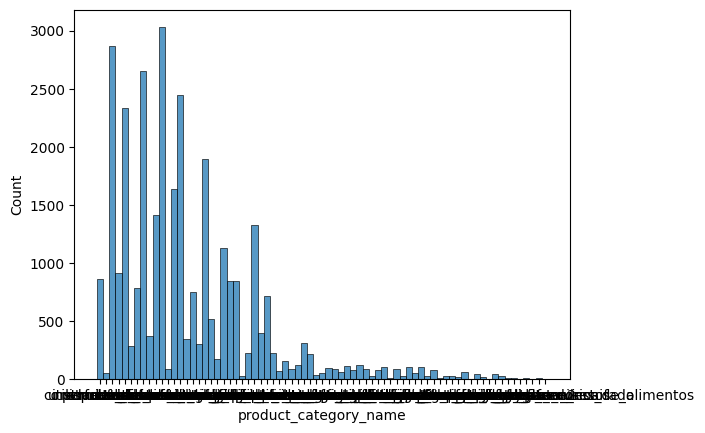

In [63]:
sns.histplot(data=df_product_filter1,x="product_category_name")

DETECT OUTLIER
1. payment_value
2. price
3. freight_value

<AxesSubplot: xlabel='payment_value', ylabel='Count'>

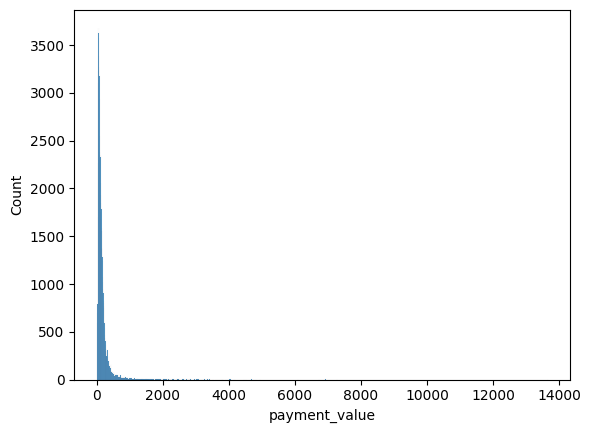

In [54]:
sns.histplot(data=df_payment, x='payment_value')

ada outlier di payment_value, kalau dicrosscek ke item, korelasi payment_value dengan item masuk akal. action  dihapus karena melebihi Q3+1,5IQR

In [55]:
# Cari Q1 & Q3
Q1 = df_payment.payment_value.quantile(0.25)
Q3 = df_payment.payment_value.quantile(0.75)

print(f"Q1 : {Q1:.2f}")
print(f"Q3 : {Q3:.2f}")
# Cari IQR & BATAS MAXIMUM
IQR = Q3 - Q1
max_bound = Q3 + 1.5*IQR

print(f"IQR : {IQR:.2f}")
print(f"Maximum Boundary : {max_bound:.2f}")
# Filter data tanpa outlier
df_payment_filter1 = df_payment[df_payment["payment_value"] < max_bound]
# Validasi hasil filter
df_payment_filter1["payment_value"].describe()

Q1 : 56.79
Q3 : 171.84
IQR : 115.05
Maximum Boundary : 344.41


count    95905.000000
mean       110.062133
std         72.785054
min          0.000000
25%         54.000000
50%         92.200000
75%        150.580000
max        344.340000
Name: payment_value, dtype: float64

<AxesSubplot: xlabel='payment_value', ylabel='Count'>

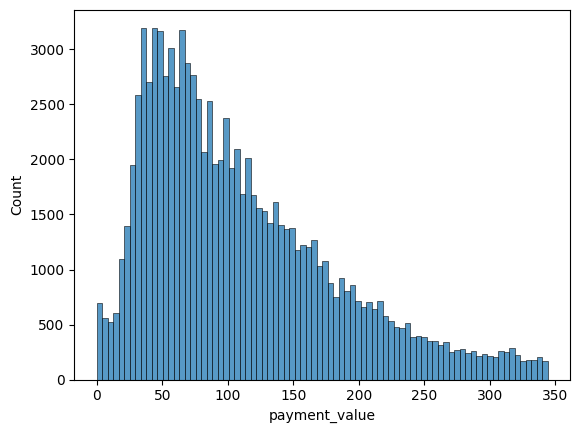

In [56]:
sns.histplot(data=df_payment_filter1, x='payment_value')

<AxesSubplot: xlabel='price', ylabel='Count'>

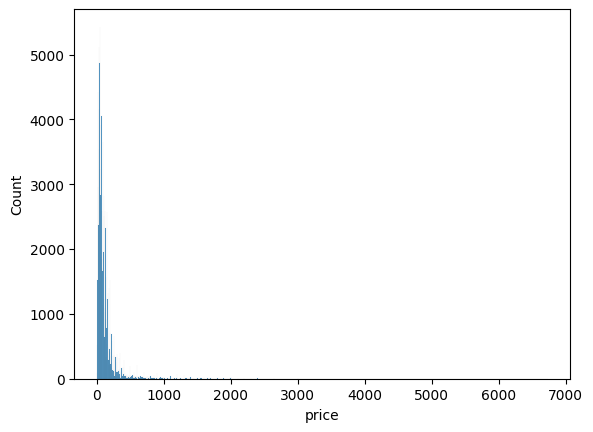

In [49]:
sns.histplot(data=df_item, x='price')

In [57]:
# Cari Q1 & Q3
Q1 = df_item.price.quantile(0.25)
Q3 = df_item.price.quantile(0.75)

print(f"Q1 : {Q1:.2f}")
print(f"Q3 : {Q3:.2f}")
# Cari IQR & BATAS MAXIMUM
IQR = Q3 - Q1
max_bound = Q3 + 1.5*IQR

print(f"IQR : {IQR:.2f}")
print(f"Maximum Boundary : {max_bound:.2f}")
# Filter data tanpa outlier
df_item_filter1 = df_item[df_item["price"] < max_bound]
# Validasi hasil filter
df_item_filter1["price"].describe()

Q1 : 39.90
Q3 : 134.90
IQR : 95.00
Maximum Boundary : 277.40


count    104223.000000
mean         83.974668
std          58.580002
min           0.850000
25%          38.500000
50%          69.000000
75%         118.990000
max         277.300000
Name: price, dtype: float64

<AxesSubplot: xlabel='price', ylabel='Count'>

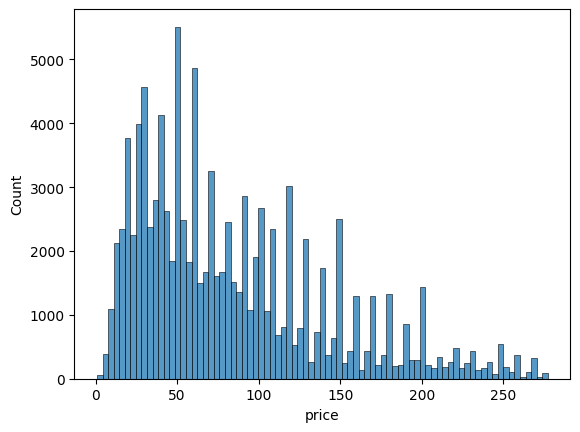

In [58]:
sns.histplot(data=df_item_filter1, x='price')

<AxesSubplot: xlabel='freight_value', ylabel='Count'>

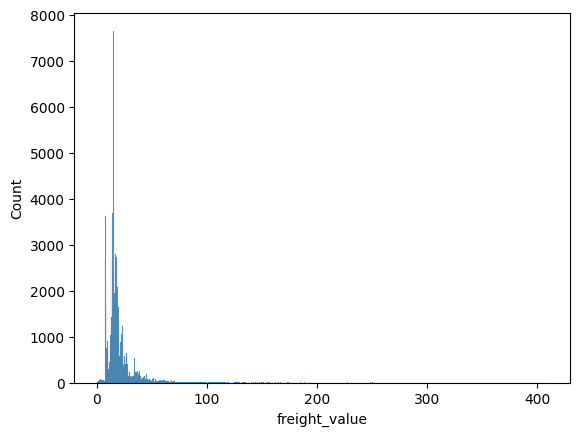

In [50]:
sns.histplot(data=df_item, x='freight_value')

In [59]:
# Cari Q1 & Q3
Q1 = df_item.freight_value.quantile(0.25)
Q3 = df_item.freight_value.quantile(0.75)

print(f"Q1 : {Q1:.2f}")
print(f"Q3 : {Q3:.2f}")
# Cari IQR & BATAS MAXIMUM
IQR = Q3 - Q1
max_bound = Q3 + 1.5*IQR

print(f"IQR : {IQR:.2f}")
print(f"Maximum Boundary : {max_bound:.2f}")
# Filter data tanpa outlier
df_item_filter2 = df_item[df_item["freight_value"] < max_bound]
# Validasi hasil filter
df_item_filter2["freight_value"].describe()

Q1 : 13.08
Q3 : 21.15
IQR : 8.07
Maximum Boundary : 33.25


count    101037.000000
mean         16.042887
std           5.574386
min           0.000000
25%          12.700000
50%          15.580000
75%          18.780000
max          33.250000
Name: freight_value, dtype: float64

<AxesSubplot: xlabel='freight_value', ylabel='Count'>

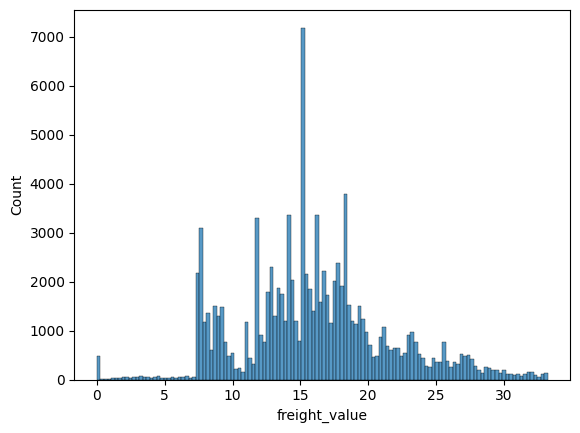

In [60]:
sns.histplot(data=df_item_filter2, x='freight_value')

ANALISA
Kita ingin mengetahui/menganalisa:
1. Produk yang paling populer diorder
2. Metode pembayaran yang paling diminati
3. Rata-rata uang yang dikeluarkan konsumen untuk membeli produk
4. Korelasi antara harga barang/item dengan ongkir

In [84]:
#df_product_filter1.product_category_name.mode()
df_product_filter2.head()

cama_mesa_banho          3029
esporte_lazer            2867
moveis_decoracao         2657
beleza_saude             2444
utilidades_domesticas    2335
Name: product_category_name, dtype: int64

1. Produk yang paling populer adalah kamar mandi meja tempat tidur, rekreasi olahraga, dekorasi furnitur, kecantikan, dan utilitas rumah tangga

In [87]:
df_payment_filter1.payment_type.value_counts()

credit_card    70269
boleto         18504
voucher         5685
debit_card      1444
not_defined        3
Name: payment_type, dtype: int64

2. Metode pembayaran paling populer adalah credit card, diikuti dengan tiket

<AxesSubplot: xlabel='payment_value', ylabel='Count'>

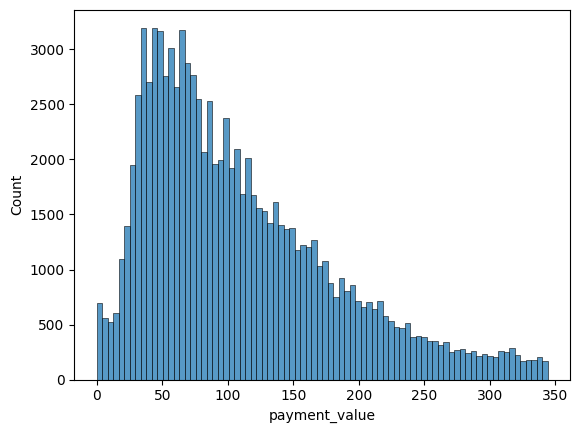

In [90]:
sns.histplot(data=df_payment_filter1["payment_value"])

In [91]:
df_payment_filter1.payment_value.mean()

110.06213346540848

In [ ]:
3. Rata-rata konsumen membelanjakan uang sebesar 110 di ecommerce ini

In [94]:
print(df_item['price'].corr(df_item['freight_value']))
print(df_item.corr())

0.41420431036303507
               order_item_id     price  freight_value
order_item_id       1.000000 -0.060522      -0.029380
price              -0.060522  1.000000       0.414204
freight_value      -0.029380  0.414204       1.000000


C:\Users\acm_f\AppData\Local\Temp\ipykernel_7792\3874514223.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_item.corr())


4. Harga barang/item tidak berkorelasi terhadap ongkos kirim. Semakin mahal harga barang/item tidak berarti ongkos kirimnya mahal pula.